In [1]:
#code using a covering gride to convert 3d array into 2d array
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
ds = yt.load("OUT_hdf5_plt_cnt_0116")


In [2]:
#code for 0116 part 2
all_data = ds.all_data()
den = all_data['density']
cv = all_data['cell_volume']
ave_vol = np.mean(cv)
den_w= den*all_data['cell_volume']/ave_vol#den.flatten()
den_mean = np.mean(den_w)
log_den = np.log(den/den_mean)

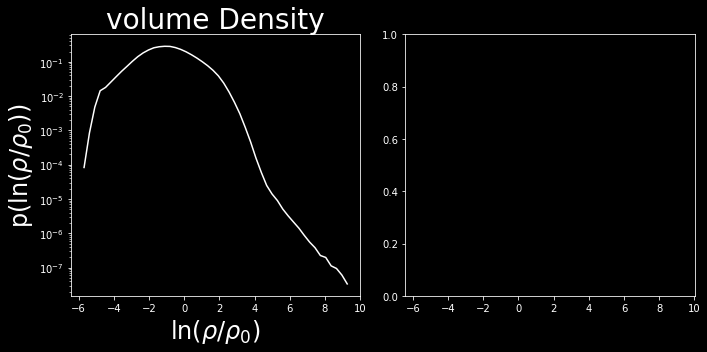

In [4]:
#graphing 0116 part 3
counts, binS = np.histogram(log_den,bins=50, density = True, weights = cv)
bin_list = []
for i in range(len(binS)-1):
    bin_i=(binS[i]+binS[i+1])/2
    bin_list.append(bin_i)
    

fig, ax = plt.subplots(nrows=1,ncols=2, sharex=True,figsize=(10,5))
ax[0].plot(bin_list, counts, color = 'w')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'ln($\rho/\rho_0$)', size=24)
ax[0].set_ylabel(r'p(ln($\rho/\rho_0$))', size=24)
ax[0].set_title('volume Density', size = 28)

plt.tight_layout()
plt.style.use('dark_background')
plt.savefig('column_den test', bbox_inches='tight')

